# Newton's method for solving nonlinear equations


## Roots of nonlinear equations
Let $f$ be a continuous function defined on $[a,b]$. A *zero* or
*root* $r$ of $f$ is a solution of the equation

$$
\begin{equation}
f(x) = 0.
\label{_auto1} \tag{1}
\end{equation}
$$

A nonlinear equation may have one, more than one, or no roots. 


**Example:**
Given the function $f(x)=x^3+x^2-3x-3$ on the interval $[-2,2]$.
Plot the function on the interval, and locate possible roots.

In [2]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

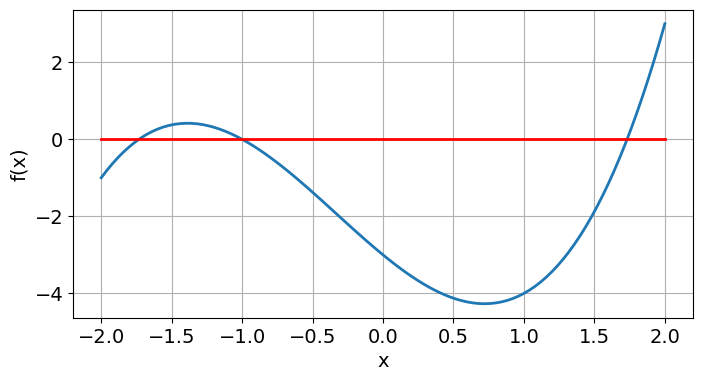

In [3]:
# Example 1
def f(x):                   # Define the function
    return x**3+x**2-3*x-3

# Plot the function on an interval 
x = linspace(-2, 2, 101)    # x-values (evaluation points)
plot(x, f(x))               # Plot the function
plot(x, 0*x, 'r')           # Plot the x-axis
xlabel('x')
grid(True)
ylabel('f(x)');

According to the plot, the function $f$ has three real roots in the interval
$[-2, 2]$. 

The function can be rewritten as $f(x) = (x+1)(x^2-3)$,
and therefore has the roots $-1$ and $\pm \sqrt{3}$. 


## Newton's method
The idea is to replace $f(x)=0$ by its linear approximation $f(x_k)+(x_{k+1}-x_k)f'(x_k)=0$ and iterate.

**Newton's method.**

  * Given $f$ and a starting value $x_0$. 

  * For $k=0,1,2,3,\dotsc$

    * $\displaystyle x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$

:::{prf:remark}
(You may skip this part.)

Let $x=r$ be a root of $f$ and $e_k=r-x_k$ the error of the method.

$$
\begin{align*}
  0 = f(r) &= f(x_k) + f'(x_k)(r-x_k) + \frac{1}{2}f''(\xi_k)(r-x_k)^2
&& \text{(Taylor's theorem)} \\ 
   0 &= f(x_k) + f'(x_k)(x_{k+1}-x_k) && \text{(Newton's method)}
\end{align*}
$$

where $\xi_k$ is between $r$ and $x_k$. Subtract the two equations to get

$$
f'(x_k)(r-x_{k+1}) + \frac{1}{2}f''(\xi_{k})(r-x_k)^2 = 0
\qquad \Rightarrow \qquad
e_{k+1} = - \frac{1}{2} \frac{f''(\xi_k)}{f'(x_k)} e_k^2.
$$

Therefore we have quadratic convergence if $f''$ is bounded and
$f'\neq0$ near $r$, and $x_0$ is sufficiently close to $r$.

:::

## Implementation

The method is implemented in the function `newton()`. The iterations are terminated when 
$|f(x_k)|$ is less than a given tolerance.

In [4]:
def newton(f, df, x0, tol=1.e-8, max_iter=30):
    # Solve f(x)=0 by Newtons method
    # The output of each iteration is printed
    # Input:
    #   f, df:   The function f and its derivate f'.
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(0, x, f(x)))
    for k in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:           # Accept the solution 
            break 
        x = x - fx/df(x)            # Newton-iteration
        print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(k+1, x, f(x)))
    return x, k+1

**Example:**
Solve $f(x)=x^3+x^2-3x-3=0$ by Newton's method. Choose $x_0=1.5$. 
The derivative of $f$ is $f'(x)=3x^2+2x-3$.

In [5]:
# Example 2
def f(x):                   # The function f
    return x**3+x**2-3*x-3

def df(x):                  # The derivative f'
    return 3*x**2+2*x-3

x0 = 1                      # Starting value
x, nit = newton(f, df, x0, tol=1.e-14, max_iter=30)  # Apply Newton
print('\n\nResult:\nx={}, number of iterations={}'.format(x, nit))

k =  0, x =  1.000000000000000, f(x) = -4.000e+00
k =  1, x =  3.000000000000000, f(x) =  2.400e+01
k =  2, x =  2.200000000000000, f(x) =  5.888e+00
k =  3, x =  1.830150753768844, f(x) =  9.890e-01
k =  4, x =  1.737795453142821, f(x) =  5.457e-02
k =  5, x =  1.732072291544954, f(x) =  2.033e-04
k =  6, x =  1.732050807871055, f(x) =  2.860e-09
k =  7, x =  1.732050807568877, f(x) =  1.776e-15


Result:
x=1.7320508075688774, number of iterations=8
